# Simple graph - Toy data 

In [7]:
import relastat as rs
import pandas as pd
import numpy as np

Make a simple graph to demonstrate how to use some of the functions.

In [3]:
df = pd.DataFrame(
    {'A': ['a1', 'a1', 'a2', 'a2', 'a1', 'a1', 'a2', 'a2'],
        'B': ['b1', 'b2', 'b1', 'b2', 'b1', 'b2', 'b1', 'b2'],
        'ID': [1, 1, 1, 1, 2, 2, 2, 2]})

relationships = ['A', 'B']
time_col = 'ID'

A1, attributes1 = rs.matrix_from_tables(
    df, relationships, dynamic_col=None, join_token='::')

['A', 'B']


Below shows how to use the `rs.matrix_from_tables` function and then how to find connected components of the matrix which contain the most elements from the specified partition. 

In [4]:
A1, attributes1 = rs.matrix_from_tables(
    df, relationships, dynamic_col=time_col, join_token='::')

c0, att0 = rs.find_cc_containing_most(A1, attributes1, partition='B', dynamic=False)
c1, att1 = rs.find_cc_containing_most(A1, attributes1, partition='A', dynamic=True)

['A', 'B']
Number of connected components: 2
Number of connected components: 2


Convert a matrix to a networkx graph.

In [5]:
G = rs.to_networkx(c1, att1)

Extracting node attributes for labels and colours to plot.

In [8]:
node_times = [G.nodes(data=True)[node]['time'] for node in G.nodes()]
node_labels = {node: G.nodes(data=True)[node]['name'] for node in G.nodes()}

time_colours = {np.nan: 'lightgrey', 1: 'red', 2.: 'lightblue'}
node_colors = [time_colours[node_color] for node_color in node_times]

Plot the networkx graph.

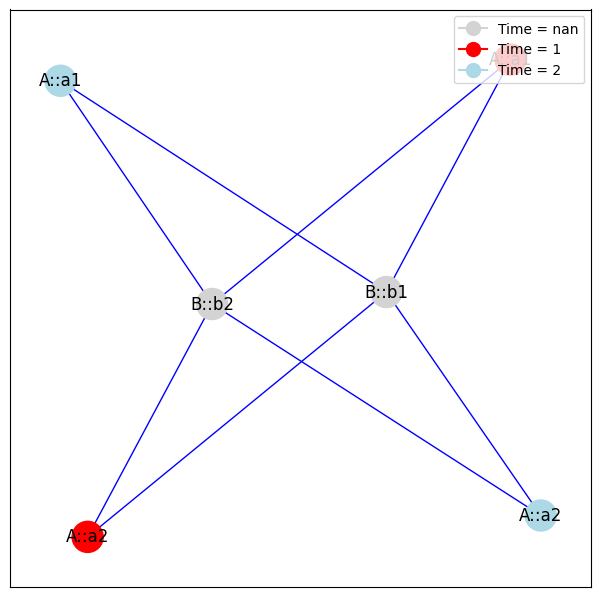

In [9]:
## plot the netowrkx graph G    
import matplotlib.pyplot as plt 
import networkx as nx
from matplotlib.lines import Line2D

plt.figure(figsize=(7.5,7.5)) 
pos = nx.spring_layout(G)   

# Drawing nodes with colors based on time and labels based on name
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='b', arrows=True)


legend_elements = [Line2D([0], [0], marker='o', color='lightgrey', label='Time = nan',
                          markerfacecolor='lightgrey', markersize=10),
                   Line2D([0], [0], marker='o', color='red', label='Time = 1',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='lightblue', label='Time = 2',
                          markerfacecolor='lightblue', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')


plt.show()